In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


## 1. Starter Analysis

In [3]:
spotify_stream_df = pd.read_json("MyData/StreamingHistory0.json")
spotify_stream_df.tail()

,endTime,artistName,trackName,msPlayed
8836,2023-05-05 14:21,A$AP Ferg,"Dreams, Fairytales, Fantasies (feat. Brent Fai...",709
8837,2023-05-05 14:21,A$AP Ferg,Floor Seats,0
8838,2023-05-05 14:21,Kendrick Lamar,u,833
8839,2023-05-05 14:26,Baby Keem,trademark usa,270670
8840,2023-05-05 14:27,A$AP Ferg,Floor Seats,70224


In [4]:
spotify_stream_df.shape

(8841, 4)

In [5]:
spotify_stream_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8841 entries, 0 to 8840
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     8841 non-null   object
 1   artistName  8841 non-null   object
 2   trackName   8841 non-null   object
 3   msPlayed    8841 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 276.4+ KB


In [6]:
spotify_stream_df.nunique() # To see the unique elemetns present in each column

endTime       4667
artistName     695
trackName     1816
msPlayed      4715
dtype: int64

In [7]:
spotify_stream_df.sample(10)

,endTime,artistName,trackName,msPlayed
8297,2023-04-26 05:50,The Local Train,Choo Lo,8831
8707,2023-05-03 19:58,Future,WAIT FOR U (feat. Drake & Tems),812
2167,2023-01-13 15:32,Kendrick Lamar,"Bitch, Don’t Kill My Vibe",981
243,2022-12-08 14:10,NAV,Wanted You (feat. Lil Uzi Vert),2453
1583,2023-01-01 15:27,Kendrick Lamar,Growing Apart (To Get Closer),220995
2024,2023-01-13 09:13,Drake,Knife Talk (with 21 Savage ft. Project Pat),23
441,2022-12-09 11:12,Drake,Knife Talk (with 21 Savage ft. Project Pat),1180
6485,2023-03-27 03:12,KK,Tum Ho Mera Pyar,7754
4553,2023-02-22 08:15,Drake,On BS,951
8568,2023-05-03 14:24,Aditya Rikhari,Faasle,221988


In [8]:
len(spotify_stream_df["artistName"].unique()) # Length of unique artist

695

there's 695 number of unique artist in my streaming history

In [9]:
len(spotify_stream_df["trackName"].unique()) # Length of unique tracks

1816

there's 1816 number of unique songs in my streaming history

## 2. Cleaning and Formatting Data

pd.to_datetime method from Pandas module to convert a object column into proper date time column.

using the to_datetime module to obatin the proper date time format and then we added that into a new column called Play-Time.

In [10]:
spotify_stream_df["Play-Time"]= pd.to_datetime(spotify_stream_df["endTime"])

- year has information about the year when we played that song
- month has information about the month when we played that song
- weekday has information about the weekday when we played that song
- time has information about the time when we played that song
- hours has information about the hour when we played that song
- day-name has information about the day with the name when we played that song. apply method for pandas dataframe with lambda function.
- new column count to keep track of the count of the songs.

In [11]:
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).weekday
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).time
spotify_stream_df['hours'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).hour
spotify_stream_df['day-name'] = spotify_stream_df["Play-Time"].apply(lambda x: x.day_name())
spotify_stream_df['Count'] = 1 

In [12]:
spotify_stream_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["msPlayed"], unit='ms')

hours and minutes calculation

In [13]:
def hours(td):
    return td.seconds/3600

def minutes(td):
    return (td.seconds/60)%60

spotify_stream_df["Listening Time(Hours)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
spotify_stream_df["Listening Time(Minutes)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)


In [14]:
spotify_stream_df.sample(10)

,endTime,artistName,trackName,msPlayed,Play-Time,year,month,day,weekday,time,hours,day-name,Count,Time-Played (hh-mm-ss),Listening Time(Hours),Listening Time(Minutes)
3922,2023-02-11 22:25,DHARIA,August Diaries,798,2023-02-11 22:25:00,2023,2,11,5,22:25:00,22,Saturday,1,0 days 00:00:00.798000,0.000,0.000
7609,2023-04-11 07:00,Metro Boomin,Metro Spider (with Young Thug),174560,2023-04-11 07:00:00,2023,4,11,1,07:00:00,7,Tuesday,1,0 days 00:02:54.560000,0.048,2.900
5922,2023-03-21 12:10,Kendrick Lamar,ELEMENT.,0,2023-03-21 12:10:00,2023,3,21,1,12:10:00,12,Tuesday,1,0 days 00:00:00,0.000,0.000
677,2022-12-19 18:15,21 Savage,Brand New Draco,2830,2022-12-19 18:15:00,2022,12,19,0,18:15:00,18,Monday,1,0 days 00:00:02.830000,0.001,0.033
3571,2023-02-07 01:46,Kendrick Lamar,N95,1609,2023-02-07 01:46:00,2023,2,7,1,01:46:00,1,Tuesday,1,0 days 00:00:01.609000,0.000,0.017
4218,2023-02-17 15:19,King,Desi Dan Bilzerian,81430,2023-02-17 15:19:00,2023,2,17,4,15:19:00,15,Friday,1,0 days 00:01:21.430000,0.022,1.350
8302,2023-04-26 19:08,Kanye West,No More Parties In LA,3710,2023-04-26 19:08:00,2023,4,26,2,19:08:00,19,Wednesday,1,0 days 00:00:03.710000,0.001,0.050
2540,2023-01-19 08:38,Drake,What’s Next,44743,2023-01-19 08:38:00,2023,1,19,3,08:38:00,8,Thursday,1,0 days 00:00:44.743000,0.012,0.733
6454,2023-03-26 16:33,Metro Boomin,Feel The Fiyaaaah (with A$AP Rocky & feat. Tak...,251,2023-03-26 16:33:00,2023,3,26,6,16:33:00,16,Sunday,1,0 days 00:00:00.251000,0.000,0.000
3655,2023-02-08 12:19,Kendrick Lamar,Money Trees,2150,2023-02-08 12:19:00,2023,2,8,2,12:19:00,12,Wednesday,1,0 days 00:00:02.150000,0.001,0.033


dropping
1. endTime as we have Play-Time column
2. msPlayed as we got the Time-Played (hh-mm-ss)
3. Time-Played (hh-mm-ss) as we got the approx time in minutes and hours in Listening Time(Hours) and Listening Time(Minutes).


In [15]:
spotify_stream_df.drop(columns=["endTime","Time-Played (hh-mm-ss)","msPlayed"], inplace=True)

In [16]:
spotify_stream_df.describe()

,Play-Time,year,month,day,weekday,hours,Count,Listening Time(Hours),Listening Time(Minutes)
count,8841,8841.000000,8841.000000,8841.000000,8841.000000,8841.000000,8841.0,8841.000000,8841.000000
mean,2023-02-20 10:03:08.232100352,2022.829205,4.239792,15.386834,2.965502,11.719602,1.0,0.023426,1.399756
min,2022-07-14 16:51:00,2022.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2023-01-13 16:11:00,2023.000000,2.000000,7.000000,1.000000,7.000000,1.0,0.000000,0.017000
50%,2023-02-20 07:38:00,2023.000000,3.000000,16.000000,3.000000,12.000000,1.0,0.003000,0.183000
75%,2023-03-29 17:26:00,2023.000000,4.000000,23.000000,5.000000,17.000000,1.0,0.050000,3.017000
max,2023-05-05 14:27:00,2023.000000,12.000000,31.000000,6.000000,23.000000,1.0,1.208000,12.500000
std,NaN,0.376351,3.676968,8.744404,1.928251,6.092721,0.0,0.031115,1.709932


## 3. Exploratory Data Analysis and Visualization

In [17]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/tmp/ipykernel_7039/1738326915.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


### 3.1 unique artist exploration

In [18]:
unique_artists = spotify_stream_df["artistName"].nunique() 
total_artists = spotify_stream_df["artistName"].count() 
unique_artist_percentage = unique_artists/total_artists*100 
unique_artist_percentage

7.8611016853297135

### 3.2 top 10 unique artist

In [19]:
top_10_artist_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Metro Boomin,27.558,1654.526,893
Kendrick Lamar,24.485,1471.179,1098
21 Savage,16.434,987.067,611
Drake,9.393,565.509,400
Kanye West,8.778,526.805,345
Baby Keem,5.862,351.867,259
Joji,5.480,329.040,270
Travis Scott,5.002,299.826,230
The Local Train,3.543,211.851,132


In [20]:
top_10_artist_time_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Metro Boomin'),
  Text(1, 0, 'Kendrick Lamar'),
  Text(2, 0, '21 Savage'),
  Text(3, 0, 'Drake'),
  Text(4, 0, 'Kanye West'),
  Text(5, 0, 'Baby Keem'),
  Text(6, 0, 'Joji'),
  Text(7, 0, 'Travis Scott'),
  Text(8, 0, 'The Local Train'),
  Text(9, 0, 'Aditya Rikhari')])

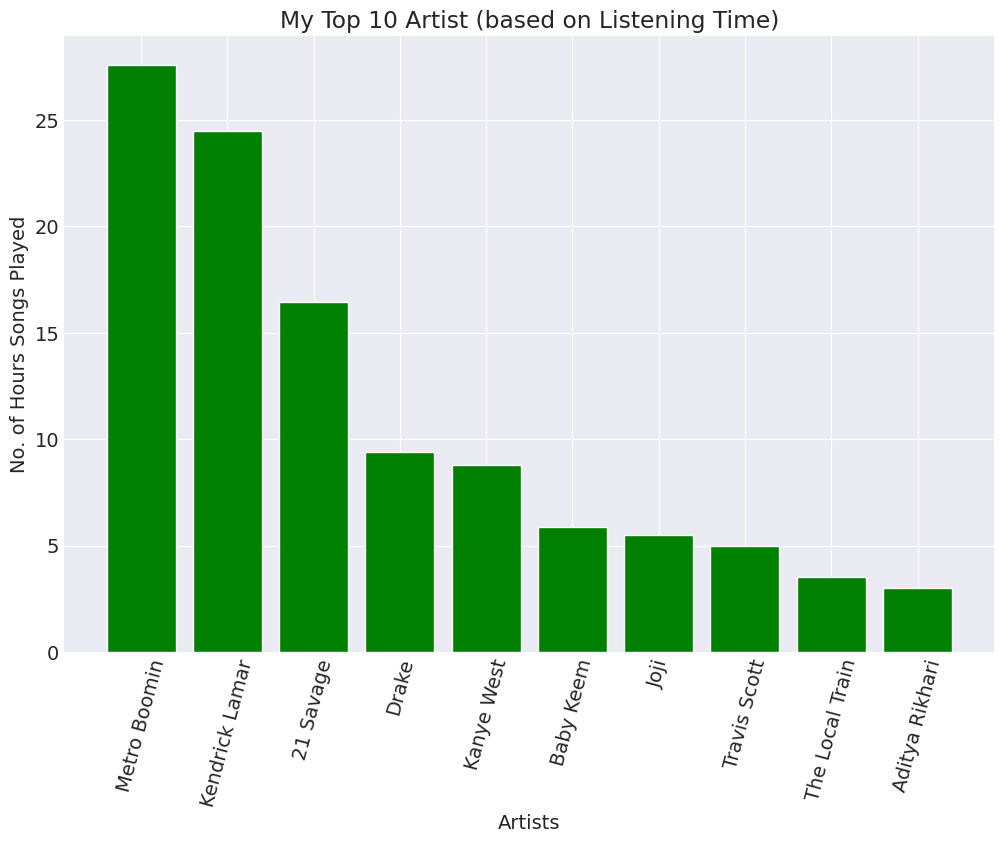

In [21]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10),color='green')
ax.set(title="My Top 10 Artist (based on Listening Time)",xlabel="Artists",ylabel="No. of Hours Songs Played")
plt.xticks(rotation=75)

black dashed line is the mean

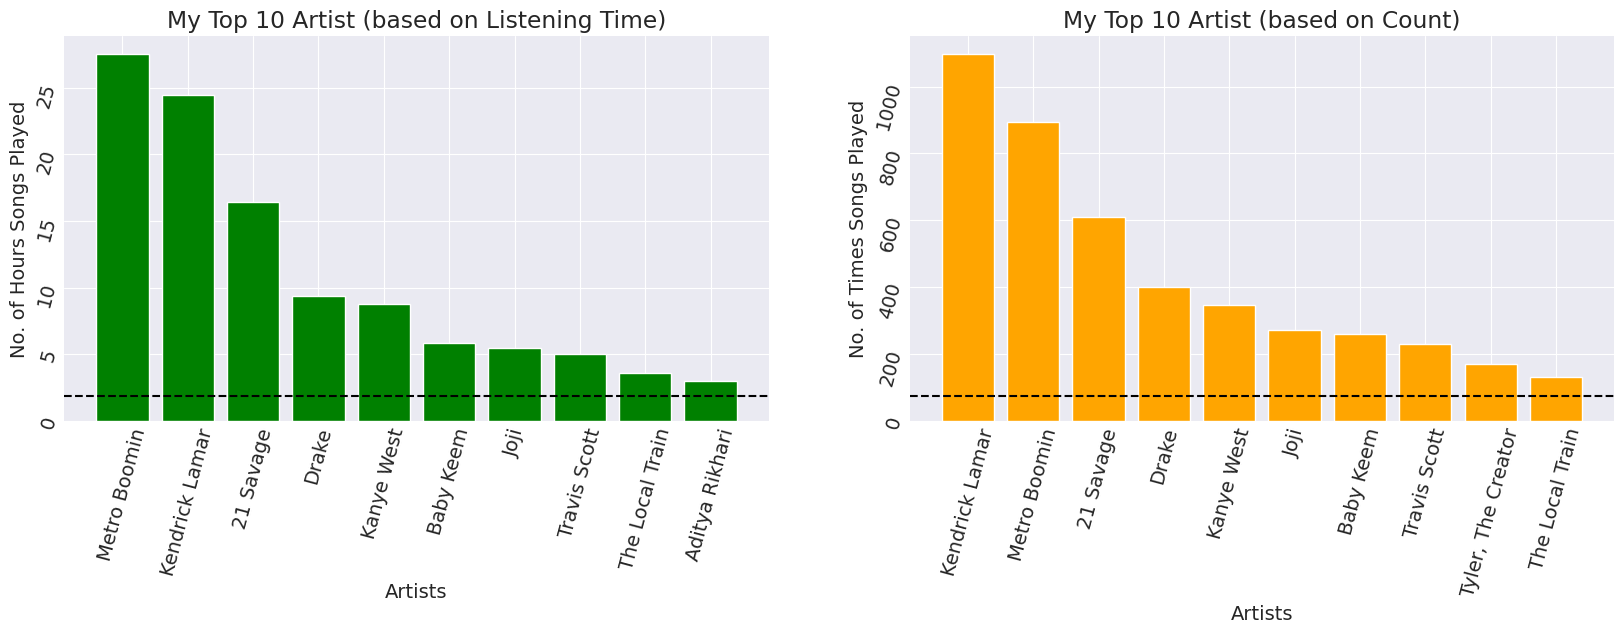

In [22]:
top_10_artist_count_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

ax1.bar(top_10_artist_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10), color="green")
ax1.set(title="My Top 10 Artist (based on Listening Time)",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=75)
ax1.axhline(top_10_artist_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="black")

ax2.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10), color="orange")
ax2.set(title="My Top 10 Artist (based on Count)",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=75)
ax2.axhline(top_10_artist_count_df["Count"][:100].mean(), linestyle="--", color="black");

### 3.3 Song track exploration

3.3.1 percentage of unique songs

In [23]:
unique_songs = spotify_stream_df["trackName"].nunique()
total_songs = spotify_stream_df["trackName"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

20.540662820947855

In [24]:
top_10_songs_time_df = spotify_stream_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_songs_count_df = spotify_stream_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)

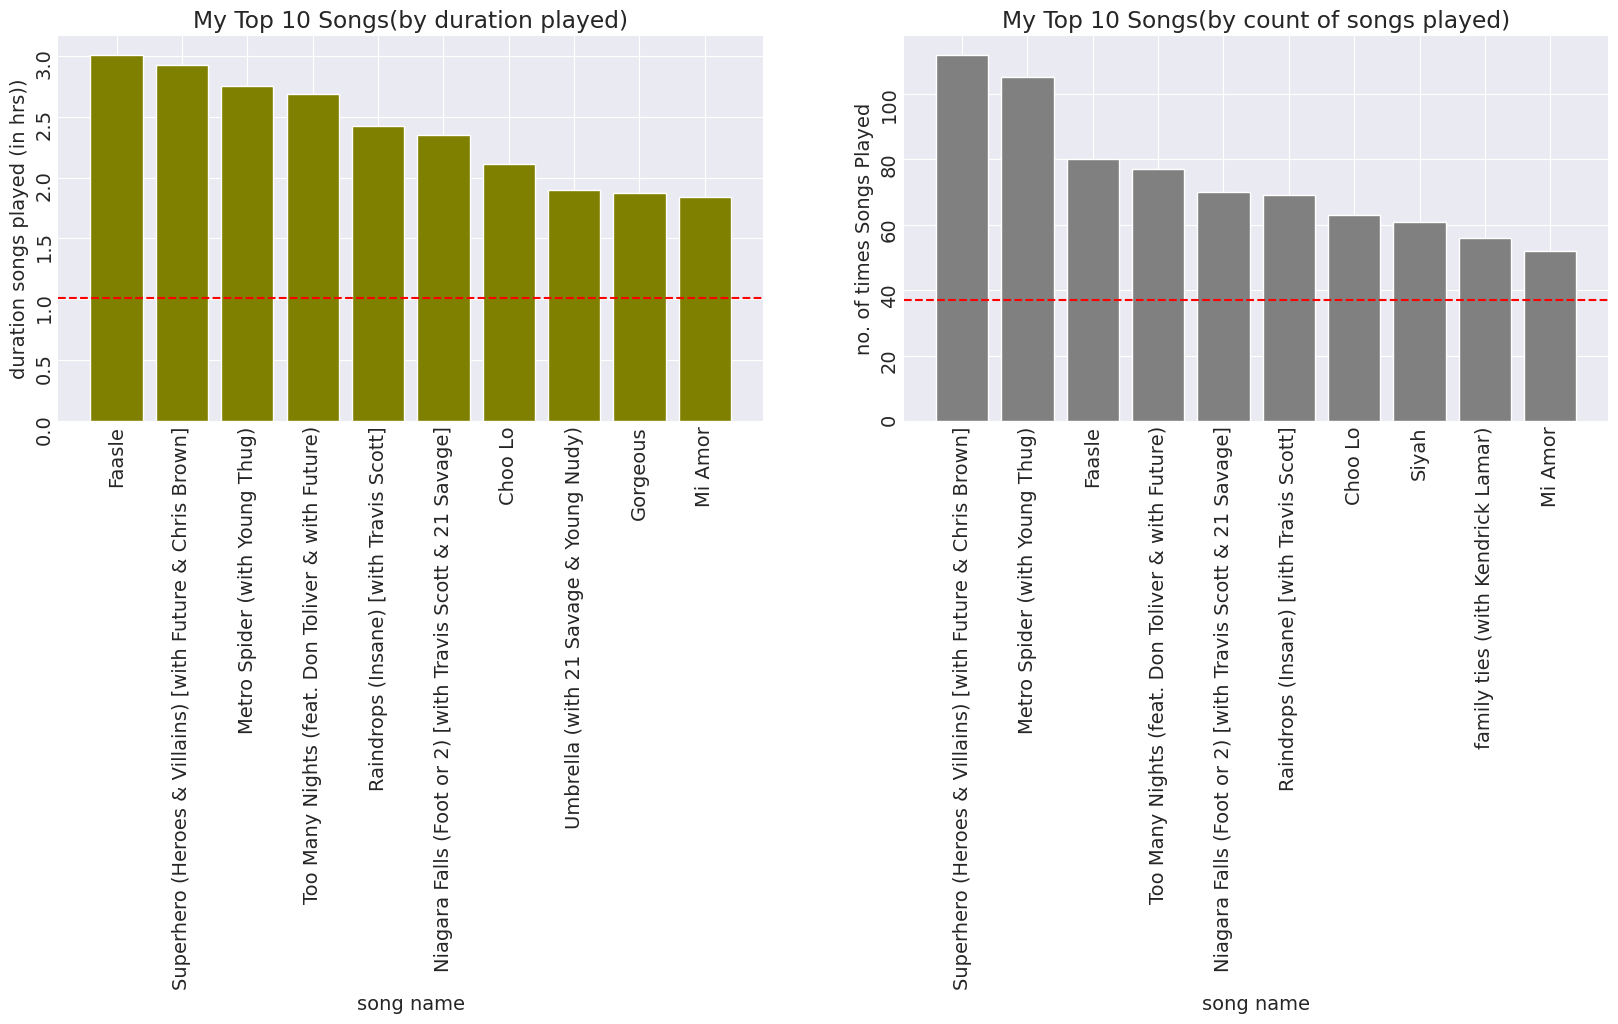

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

ax1.bar(top_10_songs_time_df.head(10).index,top_10_songs_time_df["Listening Time(Hours)"].head(10), color="olive")
ax1.set(title="My Top 10 Songs(by duration played)",xlabel="song name",ylabel="duration songs played (in hrs))")
ax1.tick_params(labelrotation=90)
ax1.axhline(top_10_songs_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="r")

ax2.bar(top_10_songs_count_df.head(10).index,top_10_songs_count_df["Count"].head(10), color="gray")
ax2.set(title="My Top 10 Songs(by count of songs played)",xlabel="song name",ylabel="no. of times Songs Played")
ax2.tick_params(labelrotation=90)
ax2.axhline(top_10_songs_count_df["Count"][:100].mean(), linestyle="--", color="r")


### 3.4 usage exploration

#### 3.4.1 day wise usage

[Text(0.5, 1.0, 'Day wise % of Spotify Streaming')]

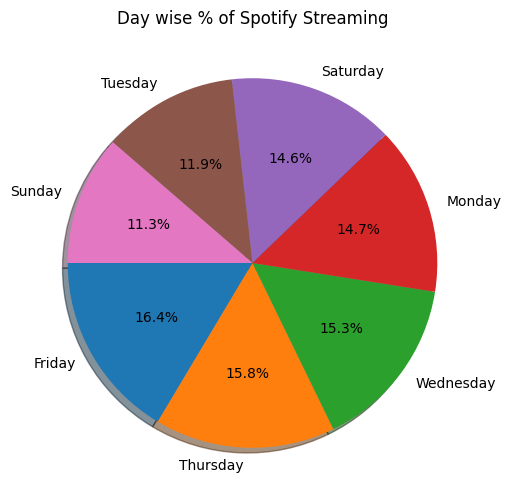

In [32]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(spotify_stream_df["day-name"].value_counts(), labels=spotify_stream_df["day-name"].value_counts().index, autopct='%1.1f%%', startangle=180, shadow = True)
ax.set(title="Day wise % of Spotify Streaming")

This pie chart illustrates that in general On Fridays, I spent more time listening to Spotify.

#### 3.4.2 Average Usage over a day

<Axes: title={'center': 'average distribution of streaming over a day'}, xlabel='Time of day (in 24 hour format)', ylabel='Songs Played'>

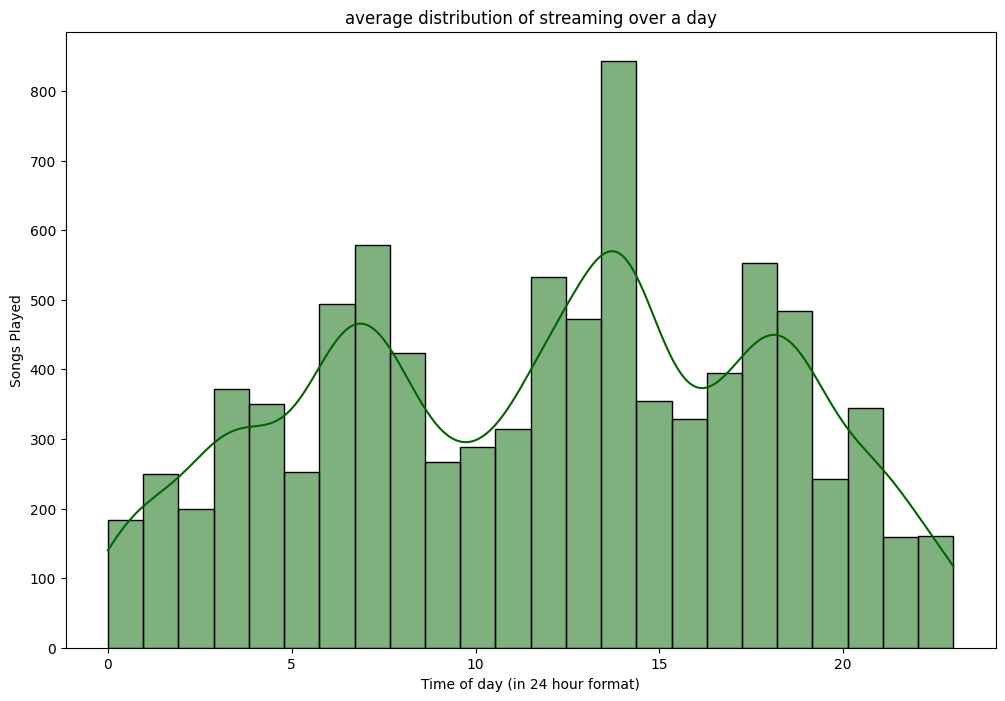

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(title="average distribution of streaming over a day",xlabel="Time of day (in 24 hour format)", ylabel="Songs Played")
sns.histplot(spotify_stream_df["hours"], bins=24,kde=True, color="darkgreen")

With this histogram graph we can see my average usage:

Maximum usage is around 2pm.</br>
Minimum usage is around 10pm to 12am.

#### 3.4.3 Average Usage In a Year

[Text(0.5, 1.0, 'Average Spotify Usage over year'),
 Text(0.5, 0, 'Songs Played (Count)'),
 Text(0, 0.5, 'Months (1-12)')]

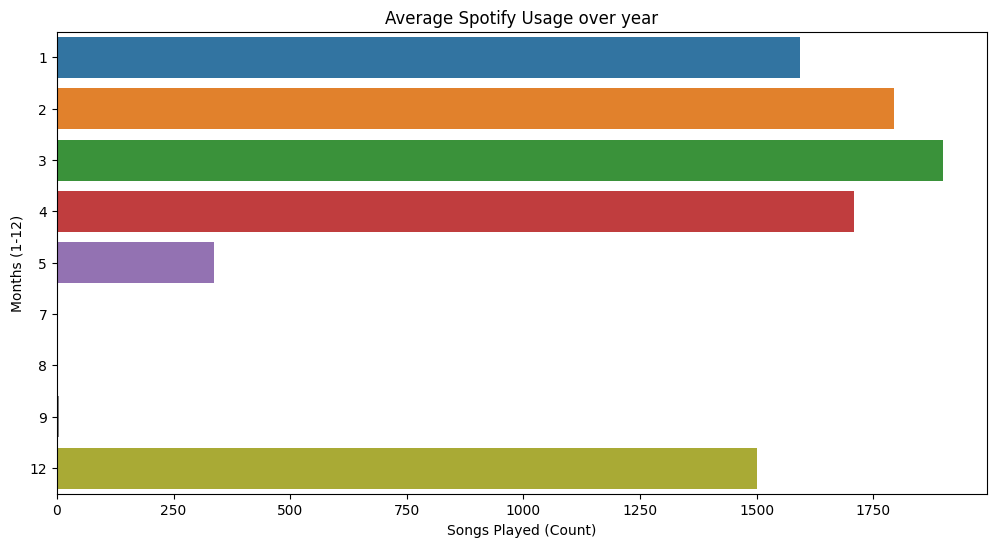

In [37]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y=spotify_stream_df["month"], ax=ax)
ax.set(title="Average Spotify Usage over year", xlabel="Songs Played (Count)", ylabel="Months (1-12)")

This histogram graph illustrates that in general I spent more time listening to Spotify in the month of March.</br>
The data is from December 2022 to May 2023.</br>
The gap in the data is because I didn't use Spotify in those months.</br>
The small slowdown in December 2022 is because of my end semester exams.</br>

In [43]:
spotify_stream_df['artistName'] = spotify_stream_df['artistName'].replace('\$\$', 'XX', regex=True)


## 4. Playbacks exploration

### 4.1 Artist playbacks

#### 4.1.1 Playback Hours per Artist

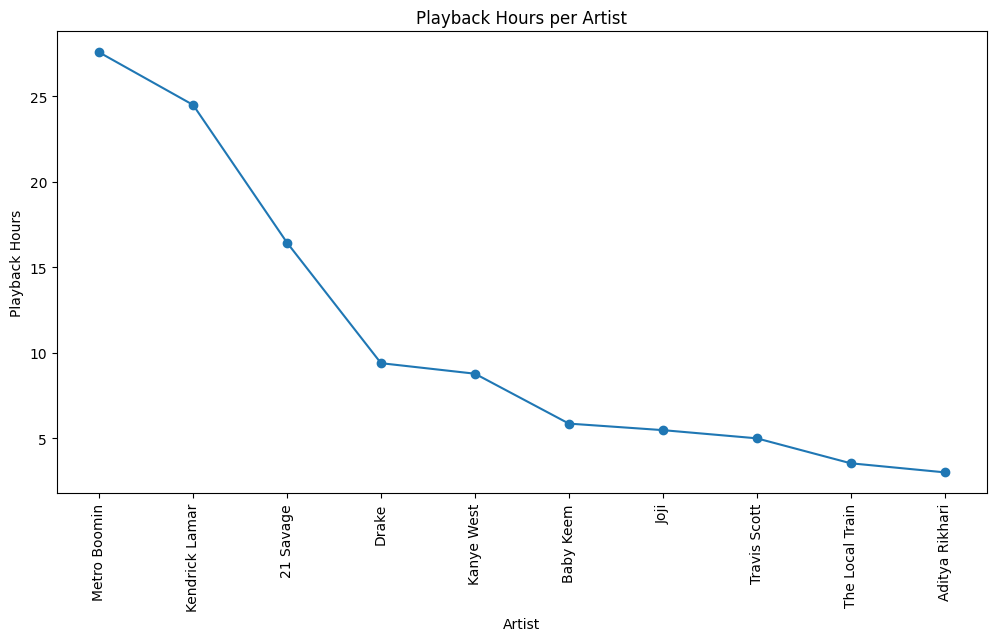

In [45]:
N = 10
artist_df = spotify_stream_df.groupby('artistName')['Listening Time(Hours)'].sum().nlargest(N)

plt.figure(figsize=(12,6))
plt.plot(artist_df.index, artist_df.values, marker='o')

plt.title('Playback Hours per Artist')
plt.xlabel('Artist')
plt.ylabel('Playback Hours')

plt.xticks(rotation=90)

plt.show()


#### 4.1.2 Playback Hours per Month

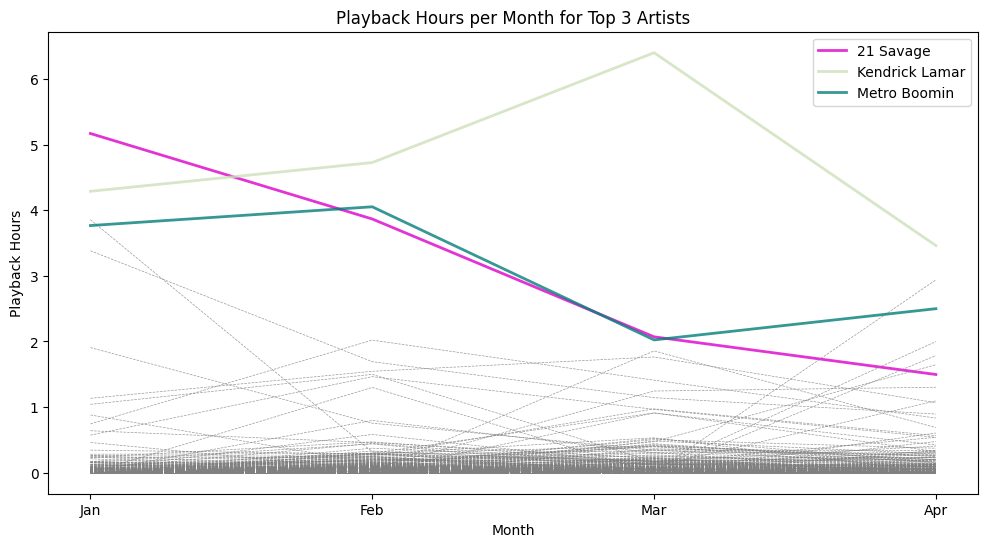

In [99]:
artist_month_df = spotify_stream_df.groupby(['artistName', 'year', 'month'])['Listening Time(Hours)'].sum().reset_index()
top_artists = artist_month_df.groupby('artistName')['Listening Time(Hours)'].sum().nlargest(3).index

artists = artist_month_df['artistName'].unique()
months = pd.date_range('2022-12-01', '2023-05-01', freq='M').strftime('%m').astype(int)
new_rows = []
for artist in artists:
    for month in months:
        new_rows.append({'artistName': artist, 'month': month, 'Listening Time(Hours)': 0})
artist_month_df = pd.concat([artist_month_df, pd.DataFrame(new_rows)])

artist_month_df = artist_month_df.groupby(['artistName', 'month'])['Listening Time(Hours)'].sum().reset_index()


plt.figure(figsize=(12, 6))
for artist in artist_month_df['artistName'].unique():
    if artist in top_artists:
        linestyle = '-'
        linewidth = 2
        label = artist
        color = np.random.rand(3,)
    else:
        linestyle = '--'
        linewidth = 0.5
        label = None
        color = 'grey'
    artist_data = artist_month_df.loc[artist_month_df['artistName'] == artist]
    #remove the values 5-11 from the x-axis
    artist_data = artist_data[artist_data['month'] < 5]
    plt.plot(artist_data['month'], artist_data['Listening Time(Hours)'], label=label, linestyle=linestyle, linewidth=linewidth, color=color, alpha=0.8)


plt.title('Playback Hours per Month for Top 3 Artists')
plt.xlabel('Month')
plt.ylabel('Playback Hours')
handles, labels = plt.gca().get_legend_handles_labels()
top_handles = handles[:3]
top_labels = labels[:3]
plt.legend(handles=top_handles, labels=top_labels)

month_names = ['Jan', 'Feb', 'Mar', 'Apr']
plt.xticks(np.arange(1, 5), month_names)

plt.show()

#### 4.1.3 Weekly Playback Hours

In [107]:
extra_df = spotify_stream_df.copy()
extra_df['weekday_or_weekend'] = extra_df["day-name"].isin(['Sunday','Saturday'])
weekday_vs_weekend = extra_df.groupby(['weekday_or_weekend'])[['Count']].sum()
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100
weekday_vs_weekend


,Count,Percentage
weekday_or_weekend,,
False,6548,74.06402
True,2293,25.93598


#### Waffle Chart

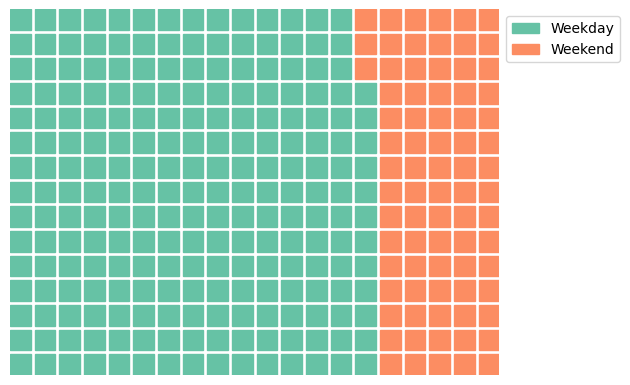

In [111]:
from pywaffle import Waffle
fig = plt.figure(FigureClass=Waffle, rows= 15, columns=20, values={'Weekday': 6548, 'Weekend': 2293},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

## 5. Some more insights

### 5.1 How many hours have I spent streaming on Spotify since I first signed up?

In [112]:
time_spent_hours = spotify_stream_df["Listening Time(Hours)"].sum() 
time_spent_hours

207.11300000000003

-> 207 hours, 6 minutes and 46 seconds (approx) since I first signed up.

### 5.2